## Import Necessary Libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import Subplot
%matplotlib inline
import os
from itertools import permutations, combinations

np.random.seed(42)

## Data Processing - Loading and Visualization

In [2]:
## Load the Data
data = load_iris()
X, y = data.data, data.target
## Convert the class 2 to class 1 - viginica and versicolor are treated the same
y[y==2] = 1
## split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
feature_names = data.feature_names
feature_inds = [0, 1, 2, 3]
feature_dict = {k: v for k, v in zip(feature_inds, feature_names)}

## Visualize Training Set

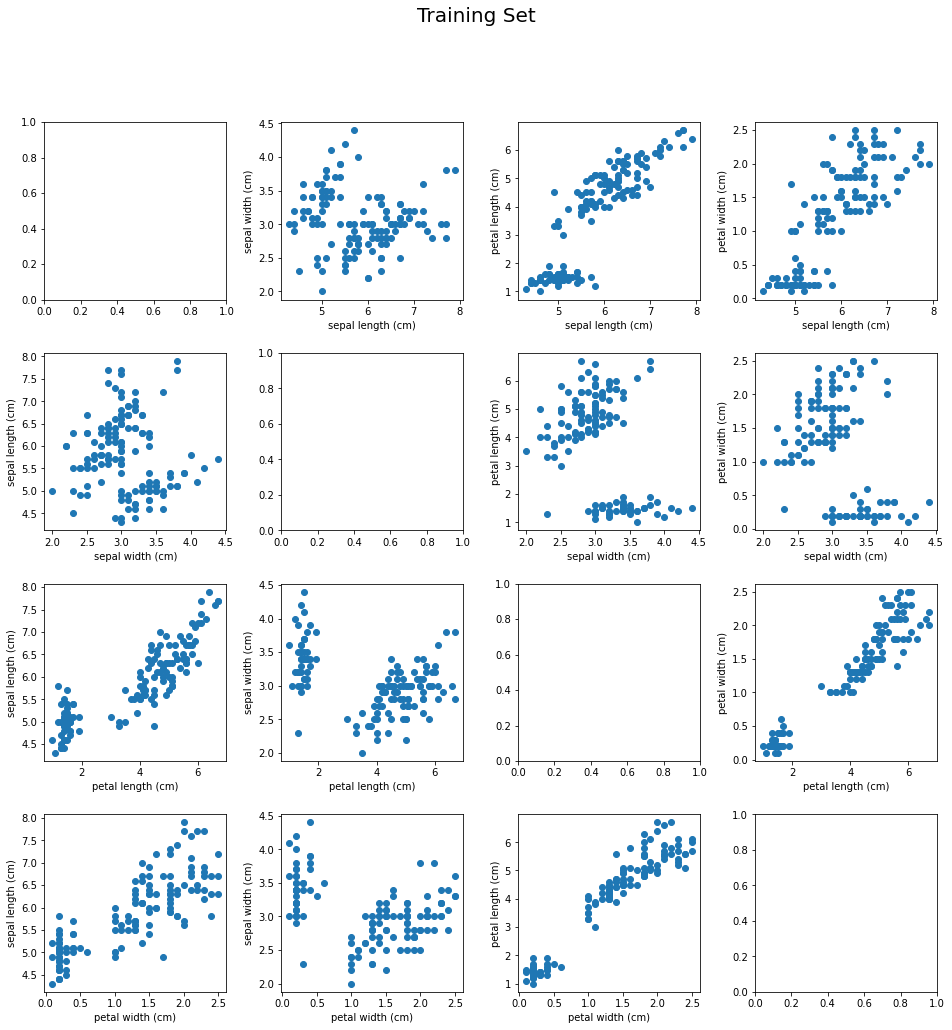

In [3]:
## visualize the samples in scatter plot for every feature combination - training set
fig, axes = plt.subplots(figsize=(16, 16), nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        if i != j:
            x_vals = X_train[:, i]
            y_vals = X_train[:, j]
            axes[i, j].scatter(x_vals, y_vals)
            axes[i, j].set_xlabel(feature_dict[i])
            axes[i, j].set_ylabel(feature_dict[j])
        else:
            pass
fig.suptitle('Training Set', fontsize=20)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

## Visualize Test Set

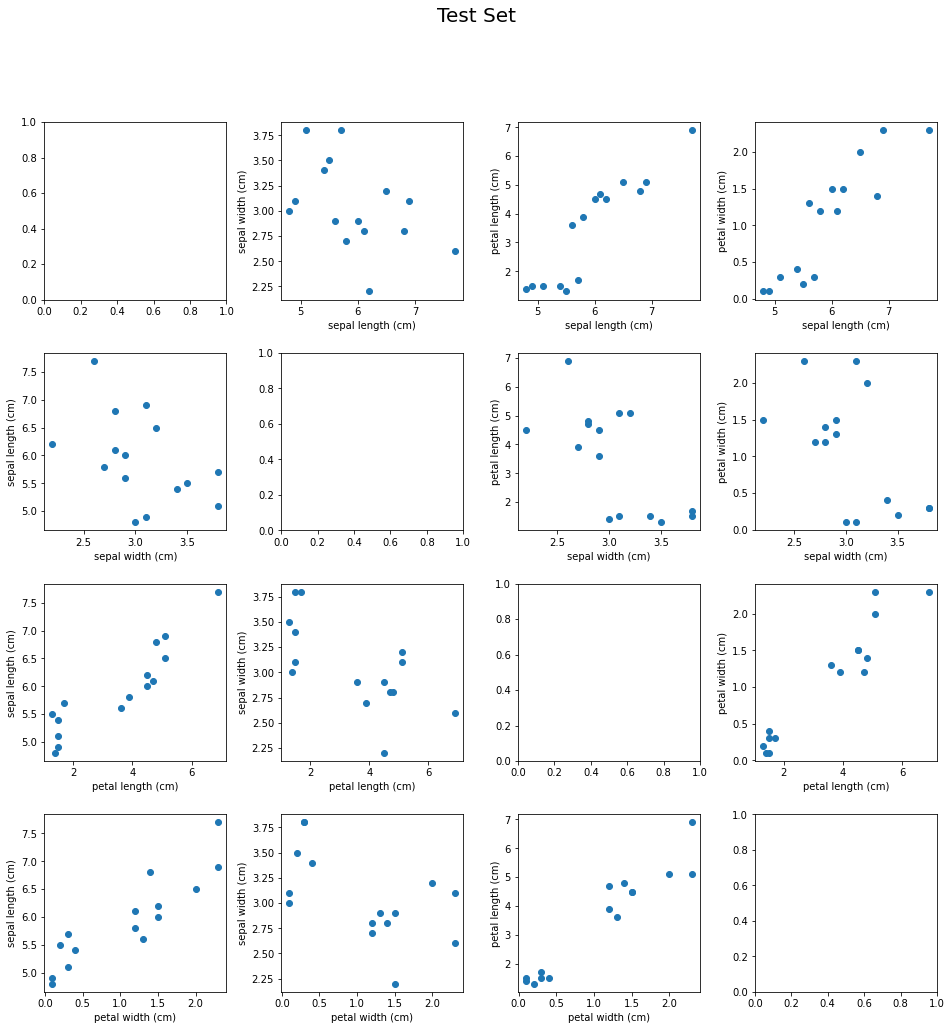

In [4]:
## visualize the samples in scatter plot for every feature combination - test set
fig, axes = plt.subplots(figsize=(16, 16), nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        if i != j:
            x_vals = X_test[:, i]
            y_vals = X_test[:, j]
            axes[i, j].scatter(x_vals, y_vals)
            axes[i, j].set_xlabel(feature_dict[i])
            axes[i, j].set_ylabel(feature_dict[j])
        else:
            pass
fig.suptitle('Test Set', fontsize=20)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

## Linear Regression 

In [5]:
def sgd_regression(X):
    """
    This function implements the stochastic gradient descent for linear regression
    Input:
        X - the numpy array of the inpendent and dependent features
    Output:
        losses - average loss across batches per epoch
        w - the weight vector for linear regression line
    """
    ## create the data
    losses = []
    n_batches = X.shape[0]//32 + 1
    Xd = np.zeros((X.shape[0], 2))
    Xd[:, 0] = X[:, 0]
    Xd[:, 1] = 1
    ## create the initialization for weights
    w = np.array([[1.], [1.]])
    for i in range(100):
        loss = 0
        for j in range(n_batches):
            # extract the batch from the data
            x = Xd[j*n_batches:(j+1)*n_batches, :]
            y = X[j*n_batches:(j+1)*n_batches, 1].reshape((-1, 1))
            # compute the error
            err = y - np.dot(x, w)
            # compute the loss
            loss = loss + 0.5*np.linalg.norm(err)**2/32
            # gradient descent steps
            w[0, 0] = w[0, 0] + 0.1*np.dot(x[:, 0].reshape((1, -1)), err)/32
            w[1, 0] = w[1, 0] + 0.1*err.sum()/32
        loss = loss/n_batches
        losses.append(loss)
    return losses, w

def sgd_regression_regularized(X):
    """
    This function implements the stochastic gradient descent for linear regression with L2 regularization
    Input:
        X - the numpy array of the inpendent and dependent features
    Output:
        losses - average loss across batches per epoch
        w - the weight vector for linear regression line
    """
    ## create the data
    losses = []
    n_batches = X.shape[0]//32 + 1
    Xd = np.zeros((X.shape[0], 2))
    Xd[:, 0] = X[:, 0]
    Xd[:, 1] = 1
    ## create the initialization for weights
    w = np.array([[1.], [1.]])
    for i in range(100):
        loss = 0
        for j in range(n_batches):
            # extract the batch from the data
            x = Xd[j*n_batches:(j+1)*n_batches, :]
            y = X[j*n_batches:(j+1)*n_batches, 1].reshape((-1, 1))
            # compute the error
            err = y - np.dot(x, w)
            # compute the loss
            loss = loss + 0.5*np.linalg.norm(err)**2/32
            # gradient descent steps with L2 regularization
            w[0, 0] = w[0, 0]*(1.0 - 0.1*1.0/32) + 0.1*np.dot(x[:, 0].reshape((1, -1)), err)/32
            w[1, 0] = w[1, 0]*(1.0 - 0.1*1.0/32) + 0.1*err.sum()/32
        loss = loss/n_batches
        losses.append(loss)
    return losses, w

## Training Linear Regression Models

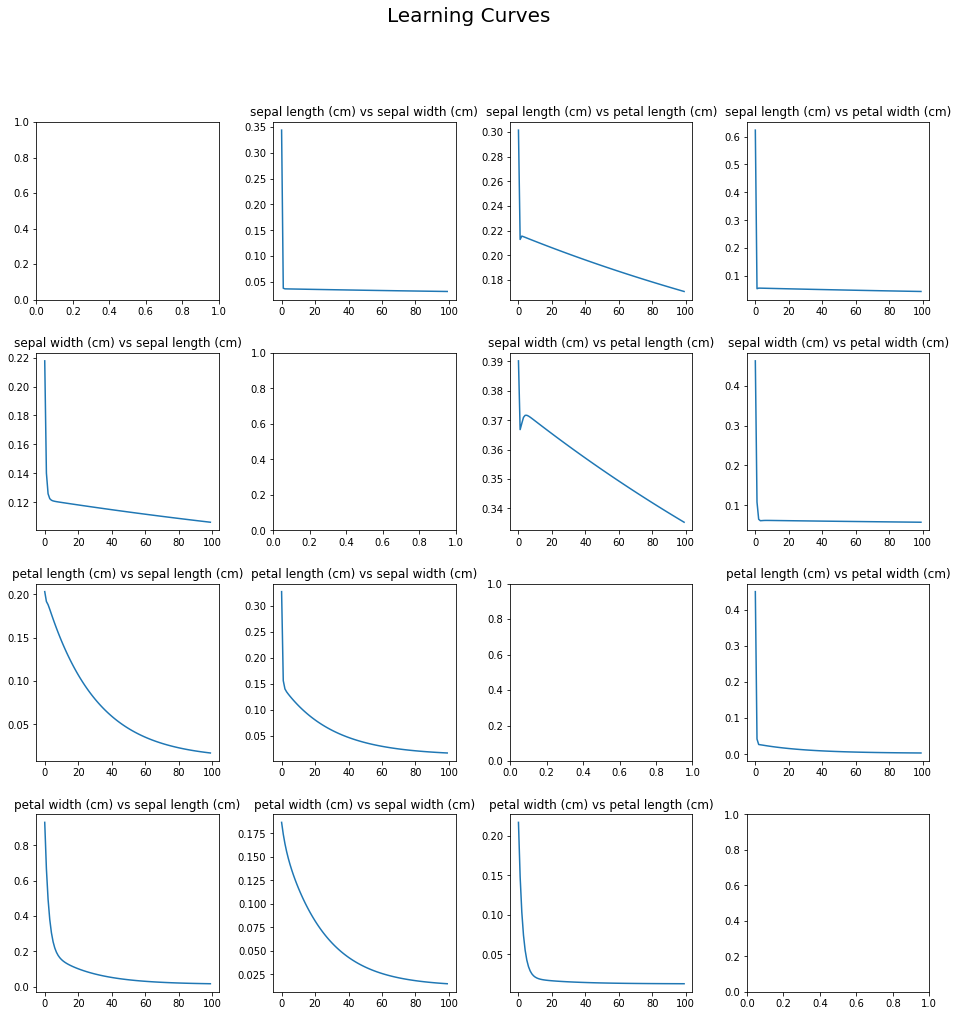

In [6]:
## train linear regression without regularization on each feature combination
fig, axes = plt.subplots(figsize=(16, 16), nrows=4, ncols=4)
model_dict = {}
for i in range(4):
    for j in range(4):
        if i != j:
            x_vals = X_train[:, i]
            y_vals = X_train[:, j]
            X = np.zeros((x_vals.shape[0], 2))
            X[:, 0] = x_vals
            X[:, 1] = y_vals
            losses, w = sgd_regression(X)
            # store the models trained above to a dict
            model_dict[(feature_dict[i], feature_dict[j])] = w
            axes[i, j].plot(losses)
            axes[i, j].set_title(feature_dict[i] + ' vs ' + feature_dict[j])
        else:
            pass
fig.suptitle('Learning Curves', fontsize=20)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

## Effect of Regularization on Linear Regression

In [7]:
## a feature combination is chosen and it is used for linear regression with L2 regularization
i = 2
j = 3
x_vals = X_train[:, i]
y_vals = X_train[:, j]
X = np.zeros((x_vals.shape[0], 2))
X[:, 0] = x_vals
X[:, 1] = y_vals
losses, w_reg = sgd_regression(X)
model_dict[(feature_dict[i], feature_dict[j])] = w
print('Independent Variable is {} and Dependent Variable is {}'.format(feature_dict[i], feature_dict[j]))
print('Weights of regularized model are: w0 = {:.4f}, w1 = {:.4f}'.format(w_reg[0, 0], w_reg[1, 0]))
print('Weights of normal model are: w0 = {:.4f}, w1 = {:.4f}'.format(w[0, 0], w[1, 0]))

Independent Variable is petal length (cm) and Dependent Variable is petal width (cm)
Weights of regularized model are: w0 = 0.3801, w1 = -0.1717
Weights of normal model are: w0 = 2.1829, w1 = 1.0891


## Testing Linear Regression

In [8]:
# the linear regression models trained above are tested on the test set 
loss_dict = {}
for i in range(4):
    for j in range(4):
        if i != j:
            x_vals = X_test[:, i]
            y_vals = X_test[:, j].reshape((-1, 1))
            Xd = np.zeros((x_vals.shape[0], 2))
            Xd[:, 0] = x_vals
            Xd[:, 1] = 1
            # load the trained models
            w = model_dict[(feature_dict[i], feature_dict[j])]
            err = y_vals - np.dot(Xd, w)
            loss = 0.5*np.linalg.norm(err)**2/y_vals.shape[0]
            # store the losses to corresponding dicts
            loss_dict[(feature_dict[i], feature_dict[j])] = loss
        else:
            pass

# the printing part
print ("{:<20} {:<20} {:<20}".format('X', 'Y', 'LOSS'))
for key, value in loss_dict.items():
    x, y = key
    print ("{:<20} {:<20} {:<20}".format(x, y, value))

X                    Y                    LOSS                
sepal length (cm)    sepal width (cm)     0.22974048174270997 
sepal length (cm)    petal length (cm)    0.9130884128785335  
sepal length (cm)    petal width (cm)     0.22491095120575755 
sepal width (cm)     sepal length (cm)    0.7299659402787538  
sepal width (cm)     petal length (cm)    1.780190807689164   
sepal width (cm)     petal width (cm)     0.28416397548278766 
petal length (cm)    sepal length (cm)    0.1276017664308557  
petal length (cm)    sepal width (cm)     0.08858520324931805 
petal length (cm)    petal width (cm)     33.609569514829076  
petal width (cm)     sepal length (cm)    0.12167772302800745 
petal width (cm)     sepal width (cm)     0.08092217611818574 
petal width (cm)     petal length (cm)    0.1244781390636703  


## Logistic Regression

In [9]:
def sgd_classification_regularized(X, y, lr):
    """
    This function implements the stochastic gradient descent for logistic regression with L2 regularization
    Input:
        X - the numpy array of the inpendent features
        y - the output labels of the corresponding samples
    Output:
        losses - average loss across batches per epoch
        w - the weight vector for linear regression line
    """
    ## create the data
    losses = []
    n_batches = X.shape[0]//32 + 1
    Xd = np.zeros((X.shape[0], 3))
    Xd[:, 0] = X[:, 0]
    Xd[:, 1] = X[:, 1]
    Xd[:, 2] = 1
    ## create the initialization for weights
    w = np.array([[1.], [1.], [1.]])
    for i in range(100):
        loss = 0
        for j in range(n_batches):
            # extract the batch from the data
            x = Xd[j*n_batches:(j+1)*n_batches, :]
            y = X[j*n_batches:(j+1)*n_batches, 1].reshape((-1, 1))
            y_pred = 1./(1. + np.exp(-np.dot(x, w)))
            # compute the error
            err = y - y_pred
            # compute the loss
            loss = loss + 0.5*np.linalg.norm(err)**2/32
            # gradient descent steps with L2 regularization
            w[0, 0] = w[0, 0]*(1.0 - lr*1.0/32) + lr*np.dot(x[:, 0].reshape((1, -1)), err)/32
            w[1, 0] = w[1, 0]*(1.0 - lr*1.0/32) + lr*np.dot(x[:, 1].reshape((1, -1)), err)/32
            w[2, 0] = w[2, 0]*(1.0 - lr*1.0/32) + lr*err.sum()/32
        loss = loss/n_batches
        losses.append(loss)
    return losses, w

## Training Logistic Regression

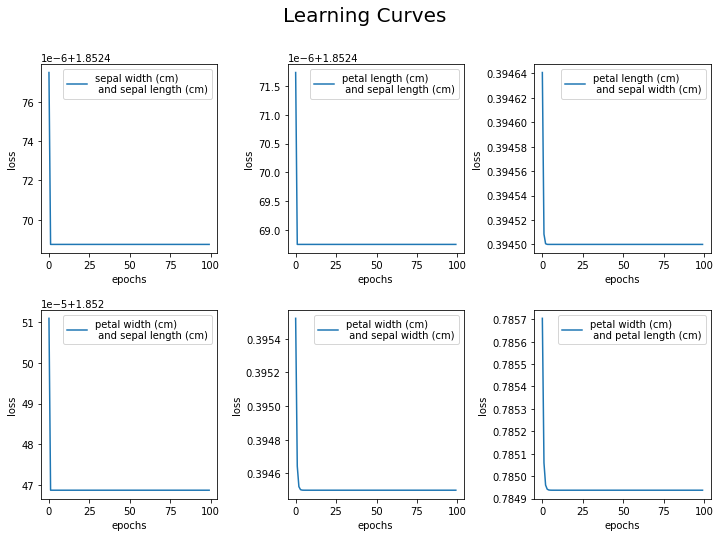

In [10]:
# train logistic regression models for 6 feature combinations
model_dict = {}
losses_dict = {}
p = 0
for i in range(4):
    for j in range(i):
        x_vals = X_train[:, i]
        y_vals = X_train[:, j]
        X = np.zeros((x_vals.shape[0], 2))
        X[:, 0] = x_vals
        X[:, 1] = y_vals
        losses, w = sgd_classification_regularized(X, y_train, 0.1)
        # store the weights and losses to respective dictionaries
        model_dict[(feature_dict[i], feature_dict[j])] = w
        losses_dict[(i, j, p)] = losses
        p = p + 1

# visualize the logistic regression models trained above
fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=3)
for k, v in losses_dict.items():
    i, j, m = k
    a = m//3
    b = m%3
    label = feature_dict[i] + ' \n and ' + feature_dict[j]
    axes[a, b].plot(v, label=label)
    axes[a, b].set_xlabel('epochs')
    axes[a, b].set_ylabel('loss')
    axes[a, b].legend(loc='best')
fig.suptitle('Learning Curves', fontsize=20)
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()

## Effect of Learning Rate on Logistic Regression

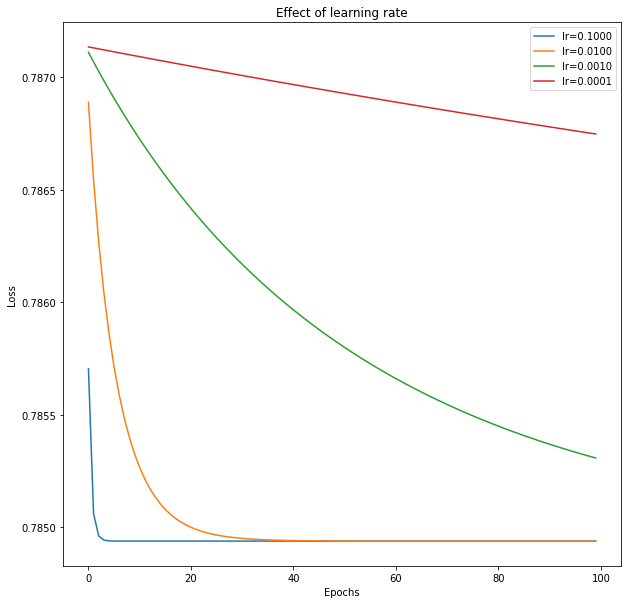

In [11]:
# define the learning rates
lrs = [0.1, 0.01, 0.001, 0.0001]
# choose a combination of features
i = 2
j = 1
plt.figure(figsize=(10, 10))
# train and visualize
for lr in lrs:
    losses, w = sgd_classification_regularized(X, y_train, lr)
    plt.plot(losses, label='lr={:.4f}'.format(lr))
plt.title('Effect of learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

## Testing Logistic Regression

In [12]:
# load the models trained above and test them on the test set
acc_dict = {}
for i in range(4):
    for j in range(i):
        x_vals = X_test[:, i]
        y_vals = X_test[:, j]
        X = np.zeros((x_vals.shape[0], 3))
        X[:, 0] = x_vals
        X[:, 1] = y_vals
        X[:, 2] = 1
        # load the model
        w = model_dict[(feature_dict[i], feature_dict[j])]
        y_pred = 1./(1. + np.exp(-np.dot(X.astype(np.float), w.astype(np.float))))
        y_pred[y_pred > 0.5] = 1
        y_pred[y_pred <= 0.5] = 0
        acc = accuracy_score(y_test, y_pred)
        # store accuracy to a dict
        acc_dict[(feature_dict[i], feature_dict[j])] = acc

# printing stuff
print ("{:<20} {:<20} {:<20}".format('X', 'Y', 'ACCURACY'))
for key, value in acc_dict.items():
    x, y = key
    print ("{:<20} {:<20} {:<20}".format(x, y, value))

X                    Y                    ACCURACY            
sepal width (cm)     sepal length (cm)    0.6                 
petal length (cm)    sepal length (cm)    0.6                 
petal length (cm)    sepal width (cm)     0.6                 
petal width (cm)     sepal length (cm)    0.6                 
petal width (cm)     sepal width (cm)     0.6                 
petal width (cm)     petal length (cm)    0.6                 
